# Importations des librairies

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor

# Importation des données

In [31]:
data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# Exploration des données

In [32]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
data.shape

(1460, 81)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


C:\Users\diogo\AppData\Local\Temp\ipykernel_16064\1763543305.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="GnBu")


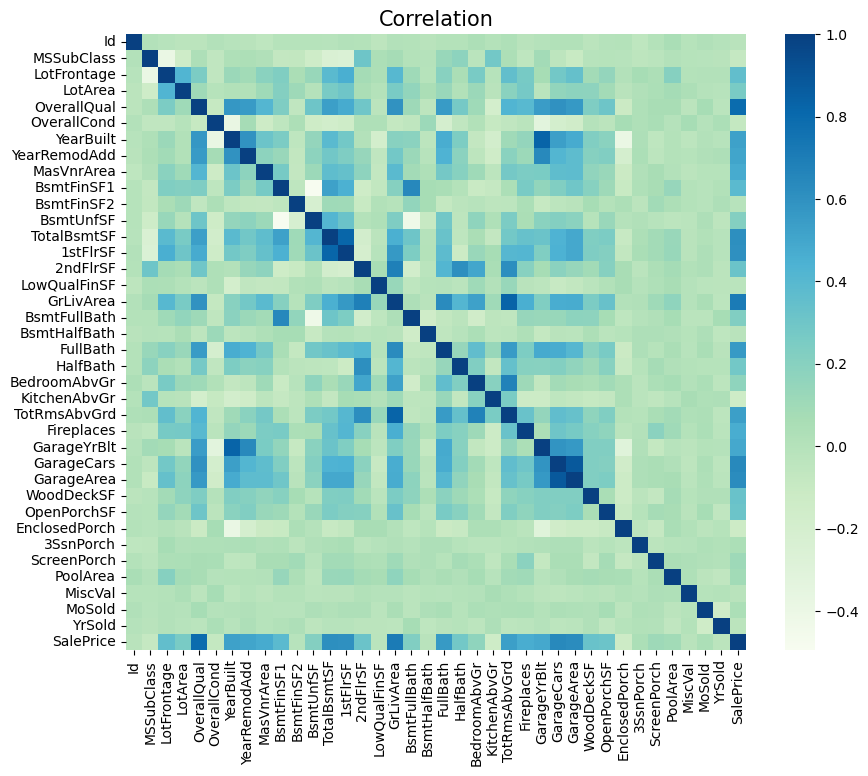

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="GnBu")
plt.title("Correlation", size=15)
plt.show()

In [37]:
cols_with_null= data.isnull().sum().sort_values(ascending=False)

In [38]:
cols_with_null.head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
dtype: int64

# Préparation des données

In [39]:
X = data.drop(['Id', 'SalePrice'], axis=1)
y = data['SalePrice']

In [40]:
percentage_null = (data.isnull().sum() / len(data)) * 100

cols_with_null_percentage = percentage_null.sort_values(ascending=False)

cols_with_null_percentage.head(10)

cols_to_drop=(cols_with_null_percentage.head(6).index).tolist()
data.drop(cols_to_drop,axis=1,inplace=True)

In [41]:
# Preprocess data
data_encoded = data

col_categorique = data_encoded.select_dtypes(include=['object']).columns

for col in col_categorique:
    freq_map = data_encoded[col].value_counts(normalize=True)
    data_encoded[col + '_f'] = data_encoded[col].map(freq_map)
    data_encoded.drop(col, axis=1, inplace=True)

data_encoded = data_encoded.fillna(data_encoded.mean())

X_numeric = data_encoded

In [42]:
# Preprocess test_data
test_data_encoded = test_data

col_categorique = test_data_encoded.select_dtypes(include=['object']).columns

for col in col_categorique:
    freq_map = test_data_encoded[col].value_counts(normalize=True)
    test_data_encoded[col + '_f'] = test_data_encoded[col].map(freq_map)
    test_data_encoded.drop(col, axis=1, inplace=True)

test_data_encoded = test_data_encoded.fillna(test_data_encoded.mean())

X_test_numeric = test_data_encoded

# Sélection des features (si c'est long c'est normal)

In [24]:
selected_features = {}

# RandomForestRegressor
estimator_rf = RandomForestRegressor(n_estimators=200, random_state=42)
selector_rf = RFE(estimator_rf, n_features_to_select=10, step=1)
selector_rf = selector_rf.fit(X_numeric, y)
selected_features['RandomForestRegressor'] = X_numeric.columns[selector_rf.support_]

# Ridge
estimator_ridge = Ridge()
selector_ridge = RFE(estimator_ridge, n_features_to_select=10, step=1)
selector_ridge = selector_ridge.fit(X_numeric, y)
selected_features['Ridge'] = X_numeric.columns[selector_ridge.support_]

# Decision Tree
estimator_tree = DecisionTreeRegressor()
selector_tree = RFE(estimator_tree, n_features_to_select=10, step=1)
selector_tree = selector_tree.fit(X_numeric, y)
selected_features['DecisionTree'] = X_numeric.columns[selector_tree.support_]

selected_features = {
    'RandomForestRegressor': X_numeric.columns[selector_rf.support_],
    'Ridge': X_numeric.columns[selector_ridge.support_],
    'DecisionTree': X_numeric.columns[selector_tree.support_]
}

filtered_features = {}

for model, features in selected_features.items():
    filtered_features[model] = [feature for feature in features if feature not in ['Id', 'SalePrice']]

# Partie Modèle

In [25]:
models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=200, random_state=42),
    'Ridge': Ridge(),
    'DecisionTree': DecisionTreeRegressor()
}

In [26]:
for model_name, model in models.items():
    # Utiliser les caractéristiques filtrées
    X_selected = X_numeric[filtered_features[model_name]]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

# Partie Prédiction

In [27]:
for model_name, model in models.items():
    features = filtered_features[model_name]  # Utiliser le dictionnaire corrigé
    X_test_selected = X_test_numeric[features]
    
    predictions = model.predict(X_test_selected)
    submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
    submission_filename = f'submission_{model_name}.csv'
    submission.to_csv(submission_filename, index=False)
    print(f"Fichier de soumission créé : {submission_filename}")

Fichier de soumission créé : submission_RandomForestRegressor.csv
Fichier de soumission créé : submission_Ridge.csv
Fichier de soumission créé : submission_DecisionTree.csv


# Test de calcul de RMSE

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import numpy as np

true_values = pd.read_csv('data/sample_submission.csv')

true_values = true_values.sort_values('Id').reset_index(drop=True)

model_names = ['RandomForestRegressor', 'Ridge', 'DecisionTree']

for model_name in model_names:
    predictions = pd.read_csv(f'submission_{model_name}.csv')
    predictions = predictions.sort_values('Id').reset_index(drop=True)
    
    log_true_values = np.log(true_values['SalePrice'])
    log_predictions = np.log(predictions['SalePrice'])
    
    rmse = sqrt(mean_squared_error(log_true_values, log_predictions))
    print(f"{model_name} Log RMSE: {rmse}")

RandomForestRegressor Log RMSE: 0.35213496955391543
Ridge Log RMSE: 0.32940002832745024
DecisionTree Log RMSE: 0.38134574692232154


# Code en entier (sans la partie exploration)

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

X = data.drop(['Id', 'SalePrice'], axis=1)
y = data['SalePrice']

percentage_null = (data.isnull().sum() / len(data)) * 100

cols_with_null_percentage = percentage_null.sort_values(ascending=False)

cols_with_null_percentage.head(10)

cols_to_drop=(cols_with_null_percentage.head(6).index).tolist()
data.drop(cols_to_drop,axis=1,inplace=True)

data_encoded = data

col_categorique = data_encoded.select_dtypes(include=['object']).columns

for col in col_categorique:
    freq_map = data_encoded[col].value_counts(normalize=True)
    data_encoded[col + '_f'] = data_encoded[col].map(freq_map)
    data_encoded.drop(col, axis=1, inplace=True)

data_encoded = data_encoded.fillna(data_encoded.mean())

X_numeric = data_encoded

test_data_encoded = test_data

col_categorique = test_data_encoded.select_dtypes(include=['object']).columns

for col in col_categorique:
    freq_map = test_data_encoded[col].value_counts(normalize=True)
    test_data_encoded[col + '_f'] = test_data_encoded[col].map(freq_map)
    test_data_encoded.drop(col, axis=1, inplace=True)

test_data_encoded = test_data_encoded.fillna(test_data_encoded.mean())

X_test_numeric = test_data_encoded


selected_features = {}

estimator_rf = RandomForestRegressor(n_estimators=200, random_state=42)
selector_rf = RFE(estimator_rf, n_features_to_select=10, step=2)
selector_rf = selector_rf.fit(X_numeric, y)
selected_features['RandomForestRegressor'] = X_numeric.columns[selector_rf.support_]

estimator_ridge = Ridge()
selector_ridge = RFE(estimator_ridge, n_features_to_select=10, step=1)
selector_ridge = selector_ridge.fit(X_numeric, y)
selected_features['Ridge'] = X_numeric.columns[selector_ridge.support_]


estimator_tree = DecisionTreeRegressor()
selector_tree = RFE(estimator_tree, n_features_to_select=10, step=1)
selector_tree = selector_tree.fit(X_numeric, y)
selected_features['DecisionTree'] = X_numeric.columns[selector_tree.support_]

selected_features = {
    'RandomForestRegressor': X_numeric.columns[selector_rf.support_],
    'Ridge': X_numeric.columns[selector_ridge.support_],
    'DecisionTree': X_numeric.columns[selector_tree.support_]
}
    
filtered_features = {}

for model, features in selected_features.items():
    filtered_features[model] = [feature for feature in features if feature not in ['Id', 'SalePrice']]


models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=200, random_state=42),
    'Ridge': Ridge(),
    'DecisionTree': DecisionTreeRegressor()
}

for model_name, model in models.items():
    # Utiliser les caractéristiques filtrées
    X_selected = X_numeric[filtered_features[model_name]]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

for model_name, model in models.items():
    features = filtered_features[model_name]  # Utiliser le dictionnaire corrigé
    X_test_selected = X_test_numeric[features]
    
    predictions = model.predict(X_test_selected)
    submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
    submission_filename = f'submission_{model_name}.csv'
    submission.to_csv(submission_filename, index=False)
    print(f"Fichier de soumission créé : {submission_filename}")

Fichier de soumission créé : submission_RandomForestRegressor.csv
Fichier de soumission créé : submission_Ridge.csv
Fichier de soumission créé : submission_DecisionTree.csv


# Résultats

Nom : Diogo Almeida78400
Rank : 2686
Score : 0.15874
Submission : 13